In [1]:
import numpy as np
import scipy.io as spio

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import sys
sys.path.append('../../utils/')

from analytical_fit import Get_Det_And_Rates
from basis_utils import Sx,Sy,Sz

In [2]:
def get_coords(filename):

    loadMat = spio.loadmat(filename,squeeze_me=True)

    coords = loadMat['spin_system']['inter'].item()['coordinates'].item()

    rep_coords = np.zeros([len(coords),3])

    for i in range(len(coords)):
        
        rep_coords[i,:] = coords[i]

    return rep_coords


def get_zeemanfreqs(filename):
    """
    Get zeeman frequencies as the average of the zeeman frequency tensors for each spin 
    """

    loadMat = spio.loadmat(filename,squeeze_me=True)
    zeem_mats = loadMat['spin_system']['inter'].item()['zeeman'].item()['matrix'].item()

    freqs = np.zeros(len(zeem_mats))

    for i in range(len(freqs)):
        freqs[i] = np.trace(zeem_mats[i])/3.0

    return freqs

def get_chemshifts(filename):
    """
    Return list of chemical shifts in rad s-1 for all nuclei, zero-ing the lowest-frequency spins 
    """
    
    zeemanfreqs = get_zeemanfreqs(filename)

    Nspins = len(zeemanfreqs)

    min_freq = np.min(zeemanfreqs)

    return zeemanfreqs-min_freq


def get_Jcouplings(filename):


    loadcoups = spio.loadmat(filename,squeeze_me=True)

    testJmat = loadcoups['Couplings']['inter'].item()['coupling'].item()['scalar'].item()
    testC = loadcoups['Couplings']['carbon13'].item()
    testN = loadcoups['Couplings']['nitrogen15'].item()
    testD = loadcoups['Couplings']['deuterons'].item()
    testsum = testC+testN+testD

    rm_idxs = np.where(testsum == 1)[0]

    filt_mat = np.delete(testJmat,rm_idxs, axis=0)
    filt_mat = np.delete(filt_mat,rm_idxs,axis=1)

    ###Cleaning up the matrix of J couplings....
    
    for i in range(filt_mat.shape[0]):
        for j in range(filt_mat.shape[1]):
            if isinstance(filt_mat[i, j], np.ndarray):
                filt_mat[i, j] = 0.0


    return filt_mat



In [110]:
ching_sys = '../../../matlab_analysis/small_spin_systems/chignolin.mat'
ching_inter = '../../../matlab_analysis/small_spin_systems/chignolin_inter.mat'

ching_sysmat = spio.loadmat(ching_sys,squeeze_me=True)
ching_intermat = spio.loadmat(ching_inter,squeeze_me=True)

###Extracting the J couplings from the loaded file...

Jcoupmat = ching_intermat['inter']['coupling'].item()['scalar'].item()

formJcoupmat = np.zeros_like(Jcoupmat,dtype=float)

for i in range(Jcoupmat.shape[0]):
        for j in range(Jcoupmat.shape[1]):

            test = isinstance(Jcoupmat[i, j], np.ndarray)
            if not test:
                #filt_mat[i, j] = 0.0
                #print(Jcoupmat[i,j])
                #print(type(float(Jcoupmat[i,j])))
                formJcoupmat[i,j] = float(Jcoupmat[i,j])
            else:
                formJcoupmat[i,j] = 0.0


In [104]:
#for i in range(formJcoupmat.shape[0]):
#    for j in range(formJcoupmat.shape[1]):
        #print(type(formJcoupmat[i,j]))


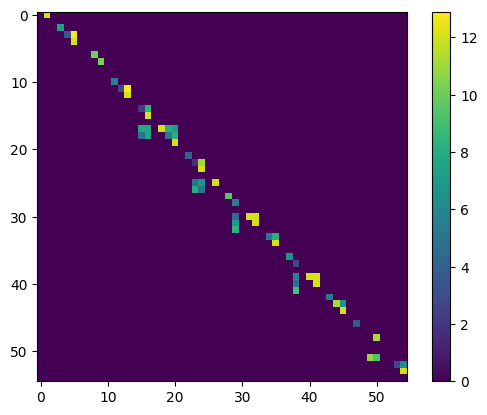

In [112]:
plt.imshow(np.abs(formJcoupmat), cmap='viridis', interpolation='nearest')
# Add a color bar to sh-1j*ow the scale

plt.colorbar()

In [133]:
nonzerolist = []
for i in range(formJcoupmat.shape[0]):
    for j in range(formJcoupmat.shape[1]):
        if formJcoupmat[i,j] != 0.0:
            nonzerolist.append(formJcoupmat[i,j])


np.max(np.abs(nonzerolist))

12.899956488053935

In [139]:
import openfermion as of

In [136]:
np.sum(np.abs(formJcoupmat))

522.2442207363357

In [144]:
1000/522

1.9157088122605364

In [145]:
80/1.915708

41.76001770624751

In [134]:
np.max(np.abs(formJcoupmat))

12.899956488053935

In [135]:
1/12.9

0.07751937984496124

In [132]:
1000/12.9

77.51937984496124

In [143]:
edges

[(0, 1, 12.0),
 (2, 3, 7.364298564186566),
 (3, 4, 3.379670199003643),
 (3, 5, 12.899956488053935),
 (4, 5, 12.0),
 (6, 8, 10.2),
 (7, 9, 10.2),
 (10, 11, 5.623267280903999),
 (11, 12, 2.834734859173328),
 (11, 13, 12.824592187651575),
 (12, 13, 12.0),
 (14, 15, 2.3564074291375205),
 (14, 16, 8.502571025497721),
 (15, 16, 12.0),
 (17, 15, 7.678992506862097),
 (17, 16, 7.614117003598883),
 (17, 18, 12.0),
 (17, 19, 8.051462598860798),
 (17, 20, 6.9394483482079945),
 (18, 15, 4.713054557461944),
 (18, 16, 7.681059325815575),
 (18, 19, 5.143833995884075),
 (18, 20, 8.013750059636088),
 (19, 20, 12.0),
 (21, 22, 4.22054531420266),
 (22, 23, 1.734994554188244),
 (22, 24, 11.150838162198996),
 (23, 24, 12.0),
 (25, 23, 5.012761001800483),
 (25, 24, 6.802723081307943),
 (25, 26, 12.0),
 (26, 23, 8.019796515074262),
 (26, 24, 5.002630367132356),
 (27, 28, 9.526330347830193),
 (28, 29, 5.425227846646206),
 (30, 29, 4.485545340437076),
 (30, 31, 12.0),
 (30, 32, 12.0),
 (31, 29, 6.99015736229330

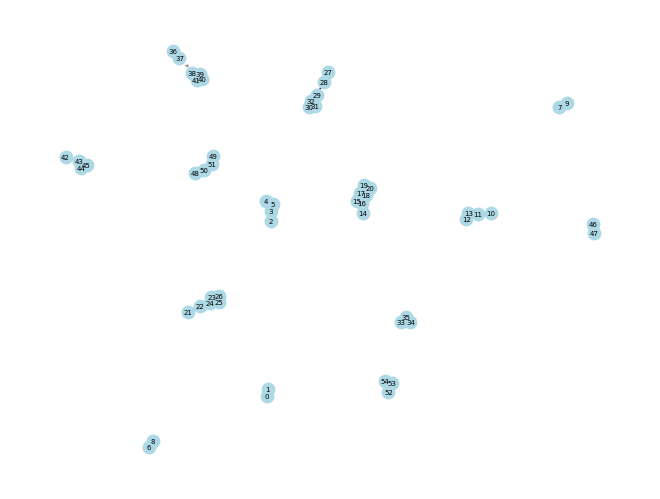

In [126]:
import networkx as nx

A = np.copy(np.abs(formJcoupmat))

edges = [(i, j, A[i][j]) for i in range(len(A)) for j in range(len(A)) if A[i][j] > 0]
G = nx.Graph()
G.add_weighted_edges_from(edges)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=80,font_size=5)
edge_labels = {(i, j): f"{w:.1f}" for i, j, w in edges}
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=2)
plt.show()


In [114]:
np.trace(formJcoupmat)

0.0

In [113]:
for i in range(formJcoupmat.shape[0]):
    print(formJcoupmat[i,i])

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
